In [38]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [39]:
dataset=pd.read_csv("D:\dissertation\Real estate.csv")

## print shape of dataset with rows and columns
print(dataset.shape)

(414, 8)


In [40]:
## print the top5 records
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the main road in meters,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [44]:
print("Number of Houses {}".format(len(dataset.No)))

Number of Houses 414


In [45]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  8


,No,X1 transaction date,X2 house age,X3 distance to the main road in meters,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
# list of variables that contain year information
age_feature = [feature for feature in numerical_features if 'date' in feature or 'age' in feature]

age_feature

['X1 transaction date', 'X2 house age']

In [47]:
# let's explore the content of these year variables
for feature in age_feature:
    print(feature, dataset[feature].unique())

X1 transaction date [2012.917 2013.583 2013.5   2012.833 2012.667 2013.417 2013.083 2013.333
 2013.25  2012.75  2013.    2013.167]
X2 house age [32.  19.5 13.3  5.   7.1 34.5 20.3 31.7 17.9 34.8  6.3 13.  20.4 13.2
 35.7  0.  17.7 16.9  1.5  4.5 10.5 14.7 10.1 39.6 29.3  3.1 10.4 19.2
 25.9 29.6 37.9 16.5 15.4 13.9 12.  16.2 13.6 16.8 36.1 34.4  2.7 36.6
 21.7 35.9 24.2 29.4 31.3 32.1 16.1 33.6  3.5 30.3 11.   5.3 17.2  2.6
 17.5 40.1  1.   8.5 30.4 12.5  6.6 35.5 32.5 13.8  6.8 12.3 20.5 38.2
 18.  11.8 30.8 25.3 15.1  1.8  8.9 23.   9.1 20.6 31.9 40.9  8.   6.4
 28.4 16.4 12.7  1.1 32.7 12.2 31.4  4.   8.1 33.3  9.9 14.8 30.6 30.9
 16.6 31.5 38.6  3.8 41.3 38.5 26.6 33.4 18.9 11.4 10.  12.9  5.1 19.8
 11.9  2.1  3.2 34.9 35.8  4.9  6.5 30.7 11.6 15.5 16.  13.7 28.2 27.6
  8.4 24.   3.6  4.3 30.2 33.  13.1 14.  26.9 13.5 17.  14.1 20.9 16.3
 35.3 43.8  9.7 15.2 22.8 34.  18.2 17.4 38.3 15.6 12.8 22.2 11.5  5.2
 17.6  6.2 18.1 37.8 28.  37.2  9.  32.4 31.  27.1 39.7  2.  32.8  4.8
  7.

Text(0.5, 1.0, 'House Price vs hse age')

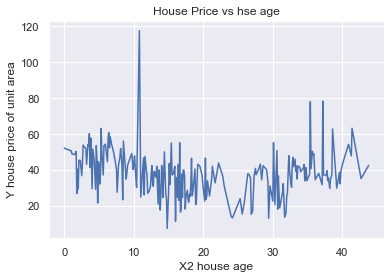

In [48]:
dataset.groupby('X2 house age')['Y house price of unit area'].median().plot()
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.title("House Price vs hse age")

In [50]:
age_feature

['X1 transaction date', 'X2 house age']

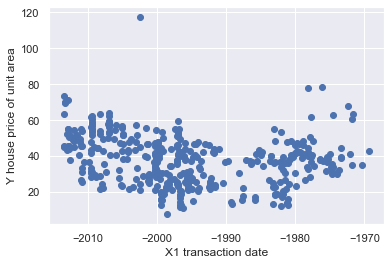

In [52]:
## Here we will compare the difference between All age feature with SalePrice

for feature in age_feature:
    if feature!='X2 house age':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['X2 house age']-data[feature]

        plt.scatter(data[feature],data['Y house price of unit area'])
        plt.xlabel(feature)
        plt.ylabel('Y house price of unit area')
        plt.show()

In [53]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in age_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [54]:
discrete_feature

['X4 number of convenience stores']

In [55]:
dataset[discrete_feature].head()

,X4 number of convenience stores
0,10
1,9
2,5
3,5
4,5


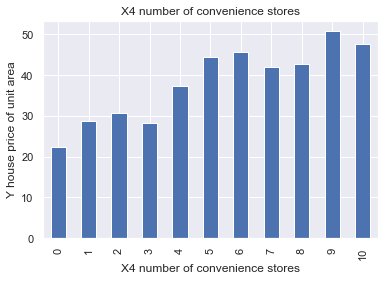

In [56]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Y house price of unit area'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Y house price of unit area')
    plt.title(feature)
    plt.show()

In [57]:
# There is a relationship between variable number and SalePrice

##Continuous Variable

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+age_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))



Continuous feature Count 5


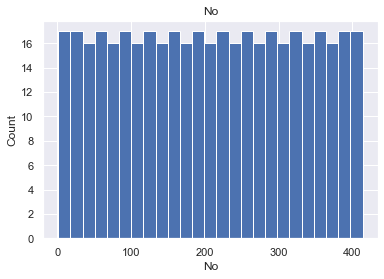

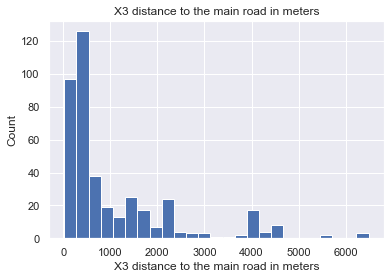

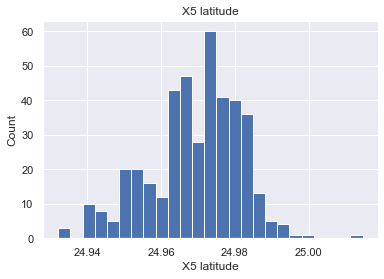

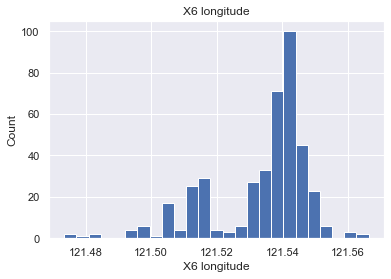

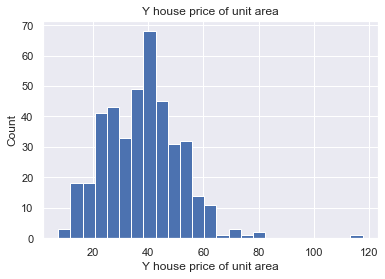

In [58]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

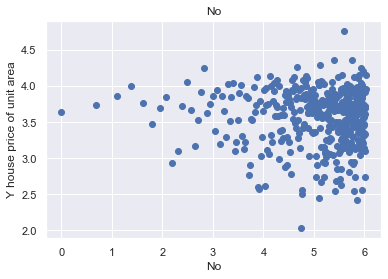

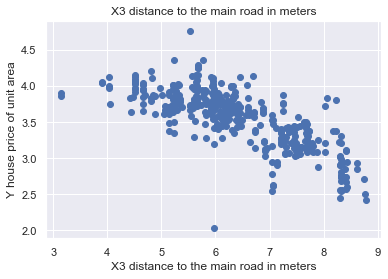

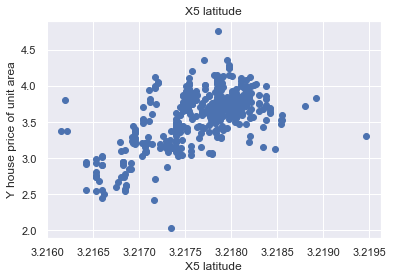

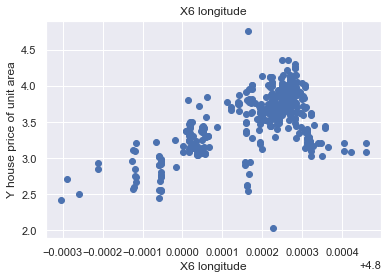

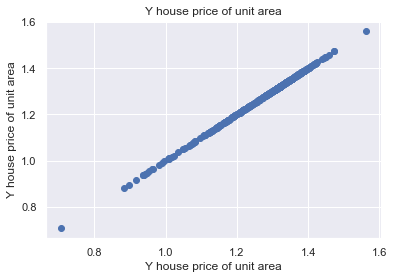

In [60]:

#Exploratory Data Analysis Part 2

## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Y house price of unit area']=np.log(data['Y house price of unit area'])
        plt.scatter(data[feature],data['Y house price of unit area'])
        plt.xlabel(feature)
        plt.ylabel('Y house price of unit area')
        plt.title(feature)
        plt.show()

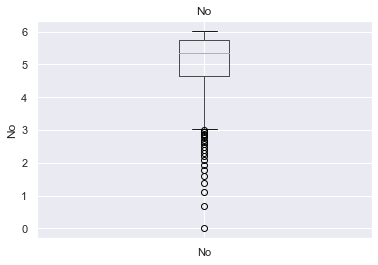

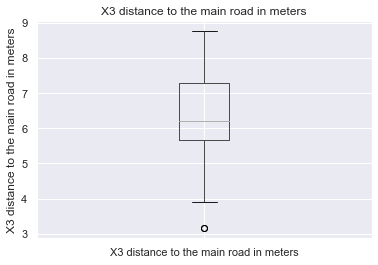

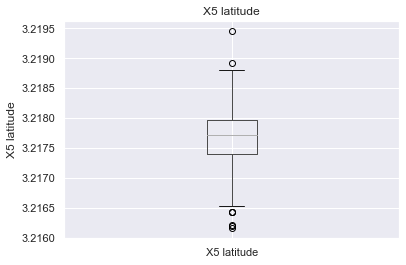

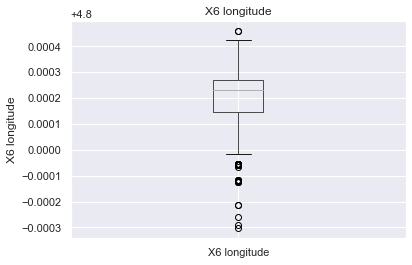

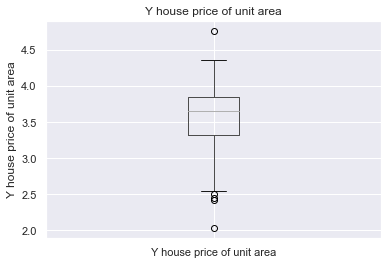

In [61]:

#Outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [62]:
#Categorical Variables

categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]

In [63]:
dataset[categorical_features].head()

""
0
1
2
3
4


In [64]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

In [65]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Y house price of unit area'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Y house price of unit area')
    plt.title(feature)
    plt.show()